<a href="https://colab.research.google.com/github/ruchi243/Sales_Analysis_and_Forecasting/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS AND SALES PREDICTION**





### Importing all the necessary libraries

In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
from sklearn import datasets, linear_model

Uploading the dataset 

In [81]:
url = 'https://raw.githubusercontent.com/ruchi243/Exploratory_Data_Analysis/main/Sample%20-%20Superstore.csv'

###Cleaning and Preprocessing the Data 

In [82]:
dataset = pd.read_csv(url)

dataset.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [83]:
dataset['Profit/Loss']=np.where(dataset.Profit>0,'P','L')


In [84]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [85]:
print(dataset.shape)

(9994, 22)


In [86]:
print(dataset.size)

219868


In [87]:
print(dataset.dtypes.value_counts())

object     16
int64       3
float64     3
dtype: int64


In [88]:
dataset.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Profit/Loss       object
dtype: object

In [89]:
print(dataset.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit/Loss'],
      dtype='object')


Check for Missing Values

In [90]:
print(dataset.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Profit/Loss      0
dtype: int64


In [91]:
duplicate = dataset[dataset.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit/Loss


In [92]:
dataset= dataset.drop([3406])

In [93]:

import datetime as dt
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Order Month'] = pd.to_datetime(dataset['Order Date']).dt.month
dataset['Order Year'] = pd.to_datetime(dataset['Order Date']).dt.year
dataset.drop(["Row ID", "Customer ID","Order ID","Postal Code","Product ID","Product Name","Country","Ship Date"], axis = 1, inplace = True)


display(dataset.head())

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit/Loss,Order Month,Order Year
0,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,P,11,2016
1,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,P,11,2016
2,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,P,6,2016
3,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,L,10,2015
4,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,P,10,2015


### Data Visualisation 

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of Orders')

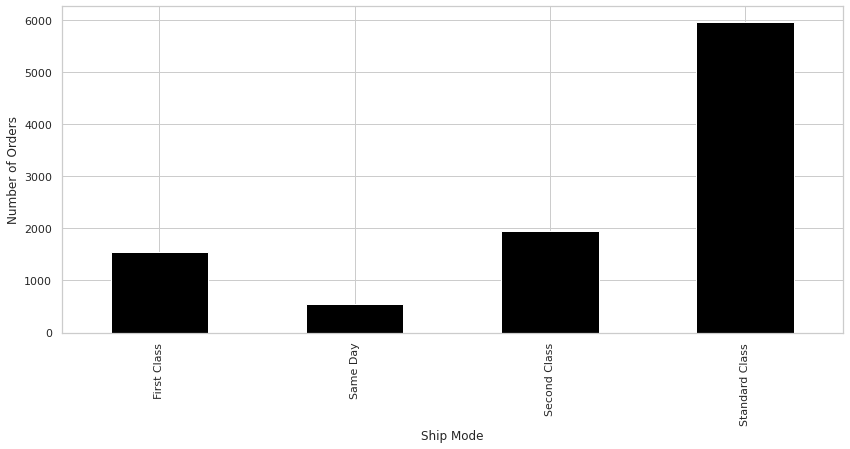

In [94]:
df1 = dataset['Ship Mode'].value_counts().sort_index(0).plot(kind='bar', figsize=(14,6),color='black')
df1.set_xlabel('Ship Mode')
df1.set_ylabel('Number of Orders')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


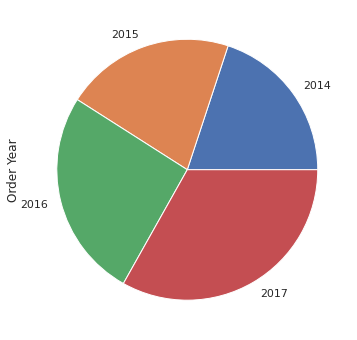

In [95]:
df1 = dataset['Order Year'].value_counts().sort_index(0).plot(kind='pie', figsize=(14,6))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of Orders')

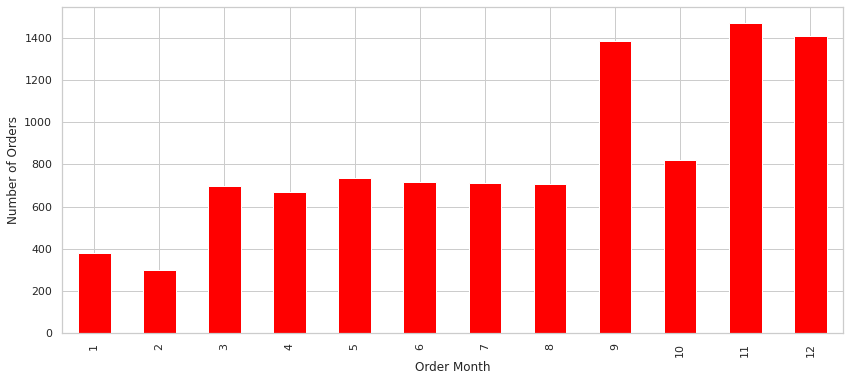

In [96]:
df1 = dataset['Order Month'].value_counts().sort_index(0).plot(kind='bar', figsize=(14,6),color='red')
df1.set_xlabel('Order Month')
df1.set_ylabel('Number of Orders')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of Orders')

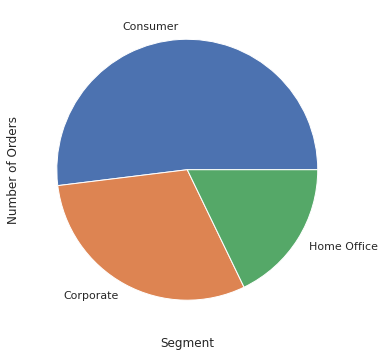

In [97]:
df1 = dataset['Segment'].value_counts().sort_index(0).plot(kind='pie', figsize=(14,6))
df1.set_xlabel('Segment')
df1.set_ylabel('Number of Orders')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


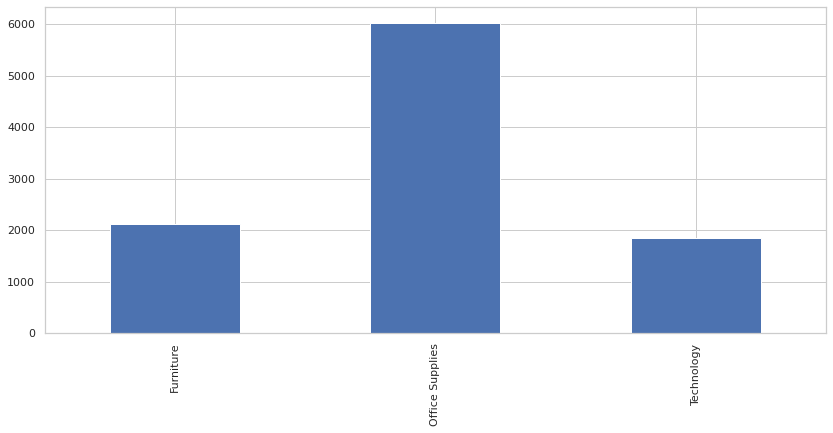

In [98]:
df1 = dataset['Category'].value_counts().sort_index(0).plot(kind='bar', figsize=(14,6))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of Orders')

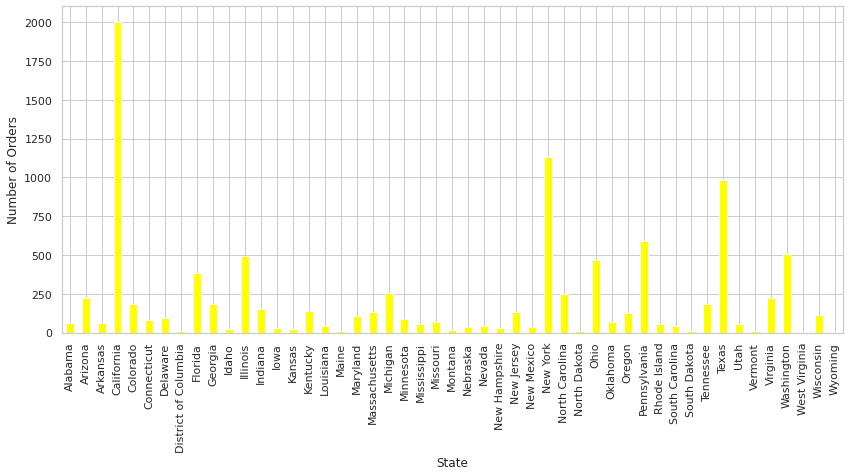

In [99]:
df1 = dataset['State'].value_counts().sort_index(0).plot(kind='bar', figsize=(14,6),color='yellow')
df1.set_xlabel('State')
df1.set_ylabel('Number of Orders')

Bivariate Analysis

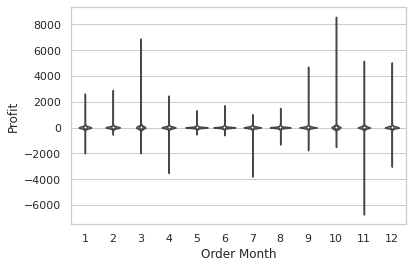

In [100]:
 sns.violinplot(x='Order Month',y='Profit',data=dataset)

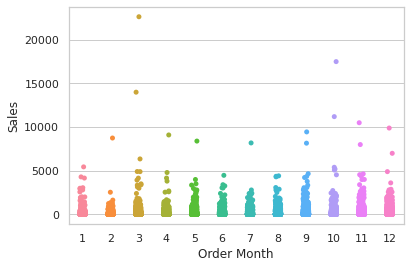

In [101]:
sns.stripplot(x='Order Month',y='Sales',data=dataset)

 

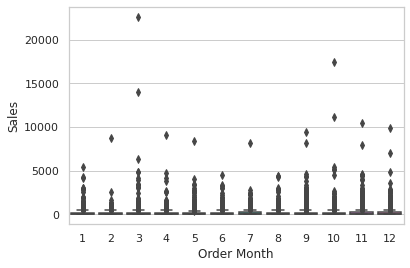

In [102]:
sns.boxplot(x='Order Month',y='Sales',data=dataset)


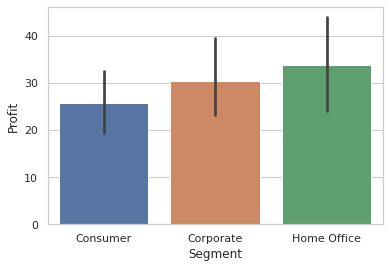

In [103]:
sns.barplot(x="Segment", y="Profit", data=dataset)

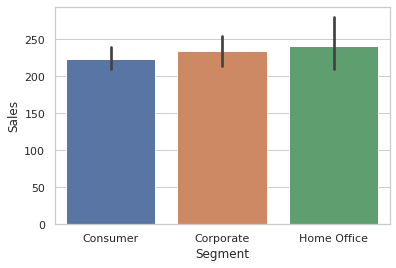

In [104]:
sns.barplot(x="Segment", y="Sales", data=dataset)


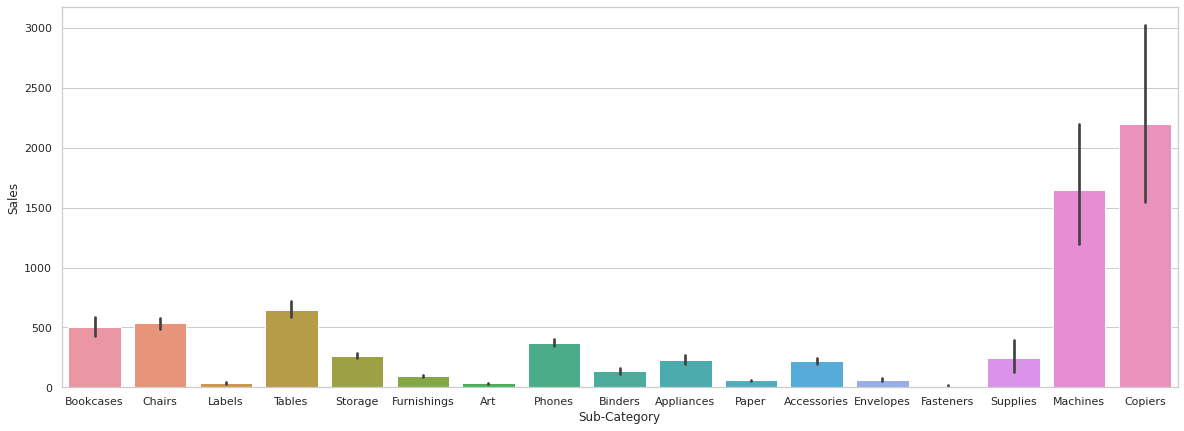

In [105]:
plt.figure(figsize=[20,7])
sns.barplot(x="Sub-Category", y="Sales", data=dataset)
plt.show()

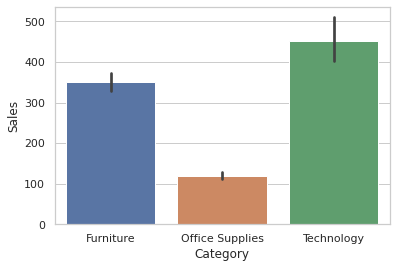

In [106]:
sns.barplot(x="Category", y="Sales", data=dataset)


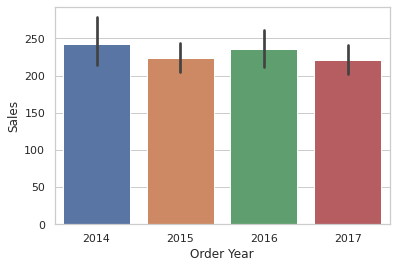

In [107]:
sns.barplot(x='Order Year',y='Sales',data=dataset)

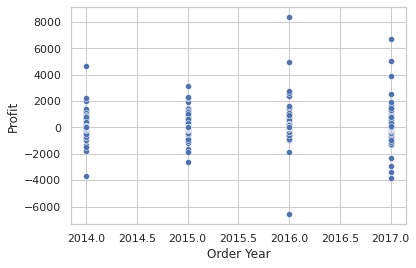

In [108]:
sns.scatterplot(x='Order Year',y='Profit',data=dataset)

Multivariate Analysis 

In [109]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


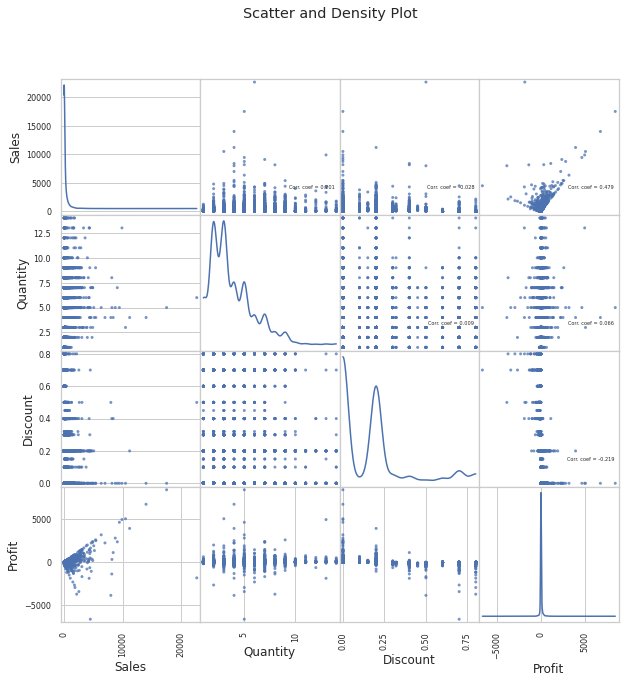

In [110]:
plotScatterMatrix(dataset.iloc[:,2:14 ], 10, 5)

In [111]:
dataset1 = dataset.filter(['Segment','Category','Sub-Category','Profit'])
table = dataset1.pivot_table(dataset1,index=['Category','Sub-Category'],columns=['Segment'], aggfunc=np.mean)
table.head()

Profit                       
Segment                        Consumer  Corporate Home Office
Category        Sub-Category                                  
Furniture       Bookcases    -33.859834   9.975784    9.837333
                Chairs        40.228972  44.386471   50.729664
                Furnishings   16.031220  12.181277    9.322933
                Tables       -61.182628 -46.287723  -57.239717
Office Supplies Appliances    28.614460  47.934808   55.614657

In [112]:
dataset1 = dataset.filter(['Customer Name','Sub-Category','Profit/Loss'])
table1 = dataset1.pivot_table(dataset1,index=['Customer Name'],columns=['Sub-Category'], aggfunc=np.mean)
table1

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:979: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  result = op.agg()


Customer Name
Aaron Bergman
Aaron Hawkins
Aaron Smayling
Adam Bellavance
Adam Hart
...
Xylona Preis
Yana Sorensen
Yoseph Carroll
Zuschuss Carroll


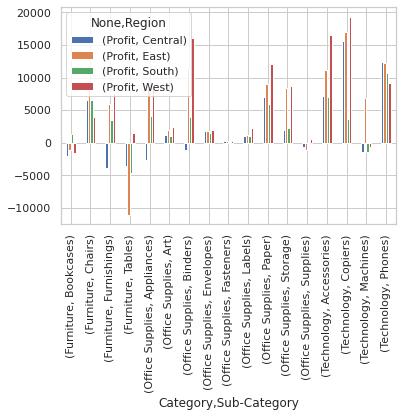

In [113]:
dataset2 = dataset.filter(['Category','Sub-Category','Region','Profit'])
table = dataset2.pivot_table(dataset2,index=['Category','Sub-Category'],columns=['Region'], aggfunc=np.sum)
table.plot(kind='bar');

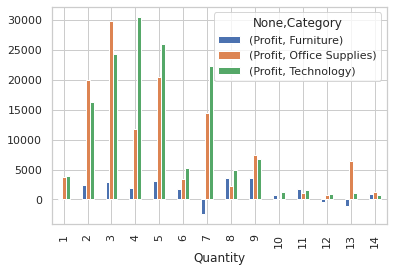

In [114]:
dataset3 = dataset.filter(['Category','Quantity','Profit'])
table = dataset3.pivot_table(dataset3,index=['Quantity'],columns=['Category'], aggfunc=np.sum)
table.plot(kind='bar');